In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [3]:
path = "/content/drive/MyDrive/IPO_analysis/Indian_IPO_Market_Data.csv"
data = pd.read_csv(path)

In [4]:
data.head()

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20


In [5]:
data.tail()

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
314,26/08/22,Syrma SGS,840.13,42.42,7.13,2.84,15.59,220,42.30
315,06/09/22,Dreamfolks Serv,562.10,27.48,14.18,24.19,23.25,326,41.92
316,15/09/22,TMB,792.00,0.51,1.77,3.44,1.39,525,-3.15
317,26/09/22,Harsha Engineer,755.00,113.82,40.36,12.44,47.19,330,47.24
318,17/10/22,Electronics Mar,500.00,58.81,15.39,8.27,24.23,59,43.14


In [6]:
data.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000
max,21000.000000,215.450000,958.070000,119.440000,326.490000,2150.000000,270.400000


In [7]:
data.shape

(319, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB


In [9]:
data.isnull().sum()

,0
Date,0
IPOName,0
Issue_Size,0
Subscription_QIB,0
Subscription_HNI,0
Subscription_RII,0
Subscription_Total,0
Issue_Price,0
Listing_Gains_Percent,0


In [10]:
data['Listing_Gains_Profit'] = data['Listing_Gains_Percent'].apply(lambda x: 1 if x > 0 else 0)

In [11]:
data.head()

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent,Listing_Gains_Profit
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82,1
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21,0
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13,1
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28,0
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20,0


In [12]:
target_distribution = data['Listing_Gains_Profit'].value_counts()
print("Distribution of Listing_Gains_Profit:\n", target_distribution)

Distribution of Listing_Gains_Profit:
 Listing_Gains_Profit
1    174
0    145
Name: count, dtype: int64


In [13]:
percentage_profit = (target_distribution[1] / target_distribution.sum()) * 100
print(f"Percentage of IPOs listed at a profit: {percentage_profit:.2f}%")

Percentage of IPOs listed at a profit: 54.55%


## Plotting / Visualization

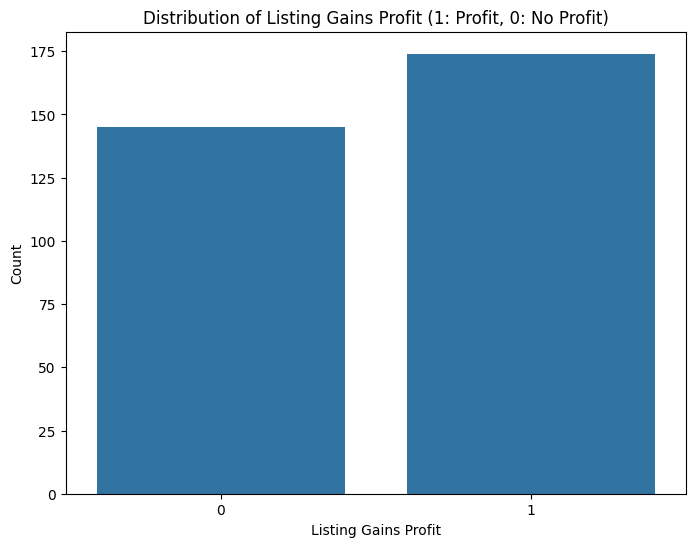

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Listing_Gains_Profit', data=data)
plt.title('Distribution of Listing Gains Profit (1: Profit, 0: No Profit)')
plt.xlabel('Listing Gains Profit')
plt.ylabel('Count')
plt.show()

In [15]:
#cheking outlier
continuous_vars = ['Issue_Size', 'Subscription_QIB', 'Subscription_HNI',
                   'Subscription_RII', 'Subscription_Total', 'Issue_Price', 'Listing_Gains_Percent']

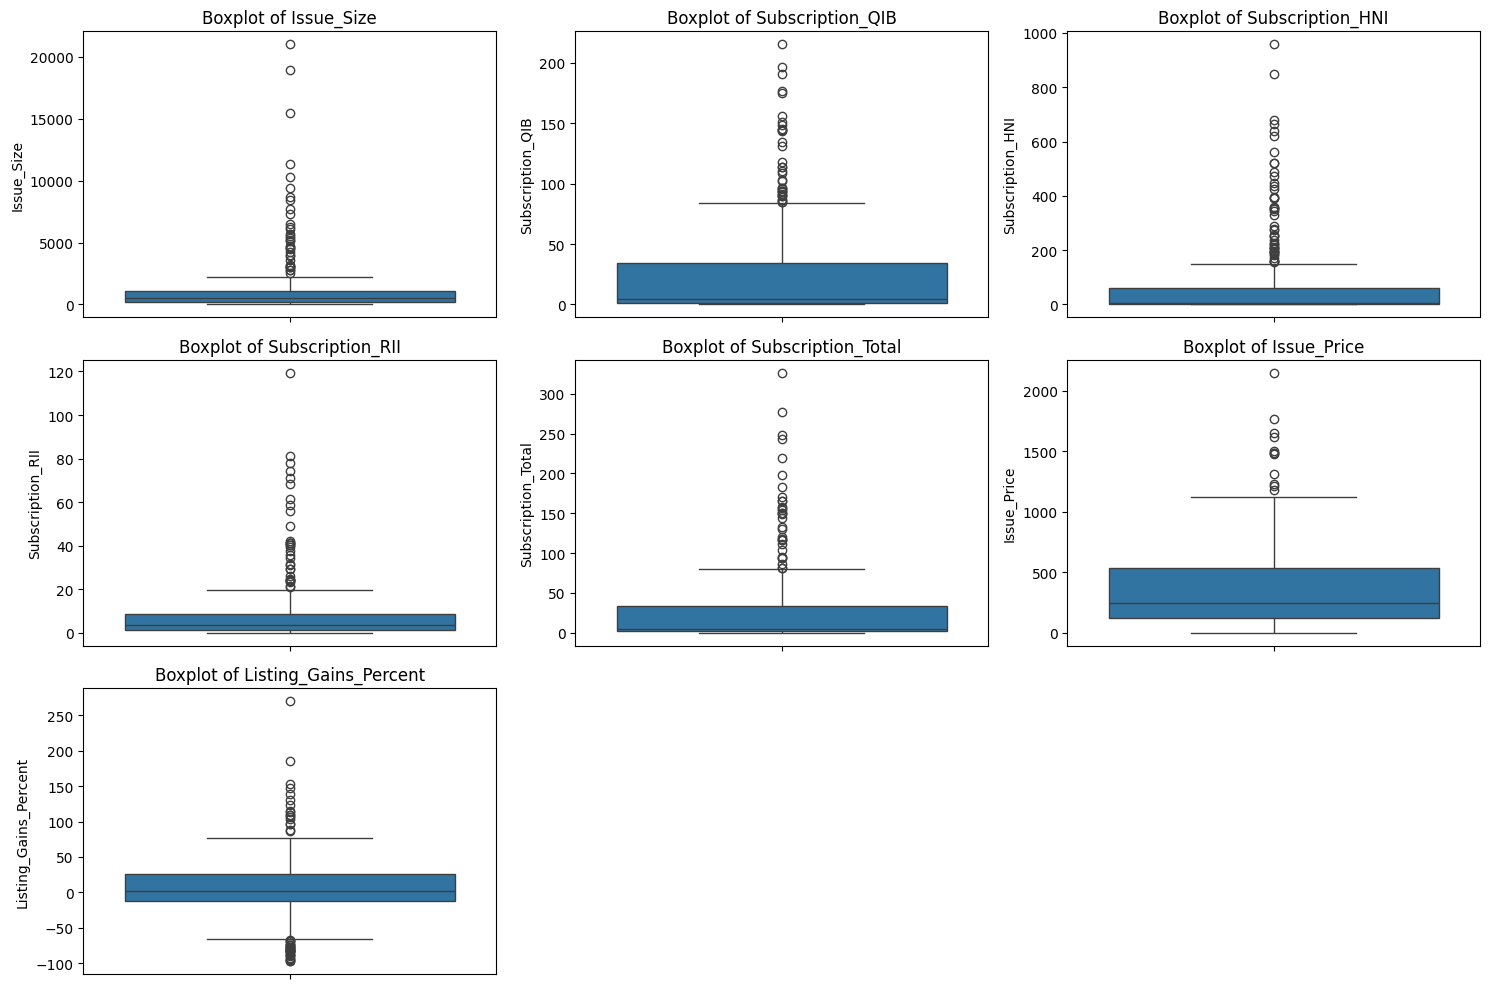

In [16]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[var])
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

### As we can see, there are many outliers. Some of them needs to be treated. It totally depends upon the data we have

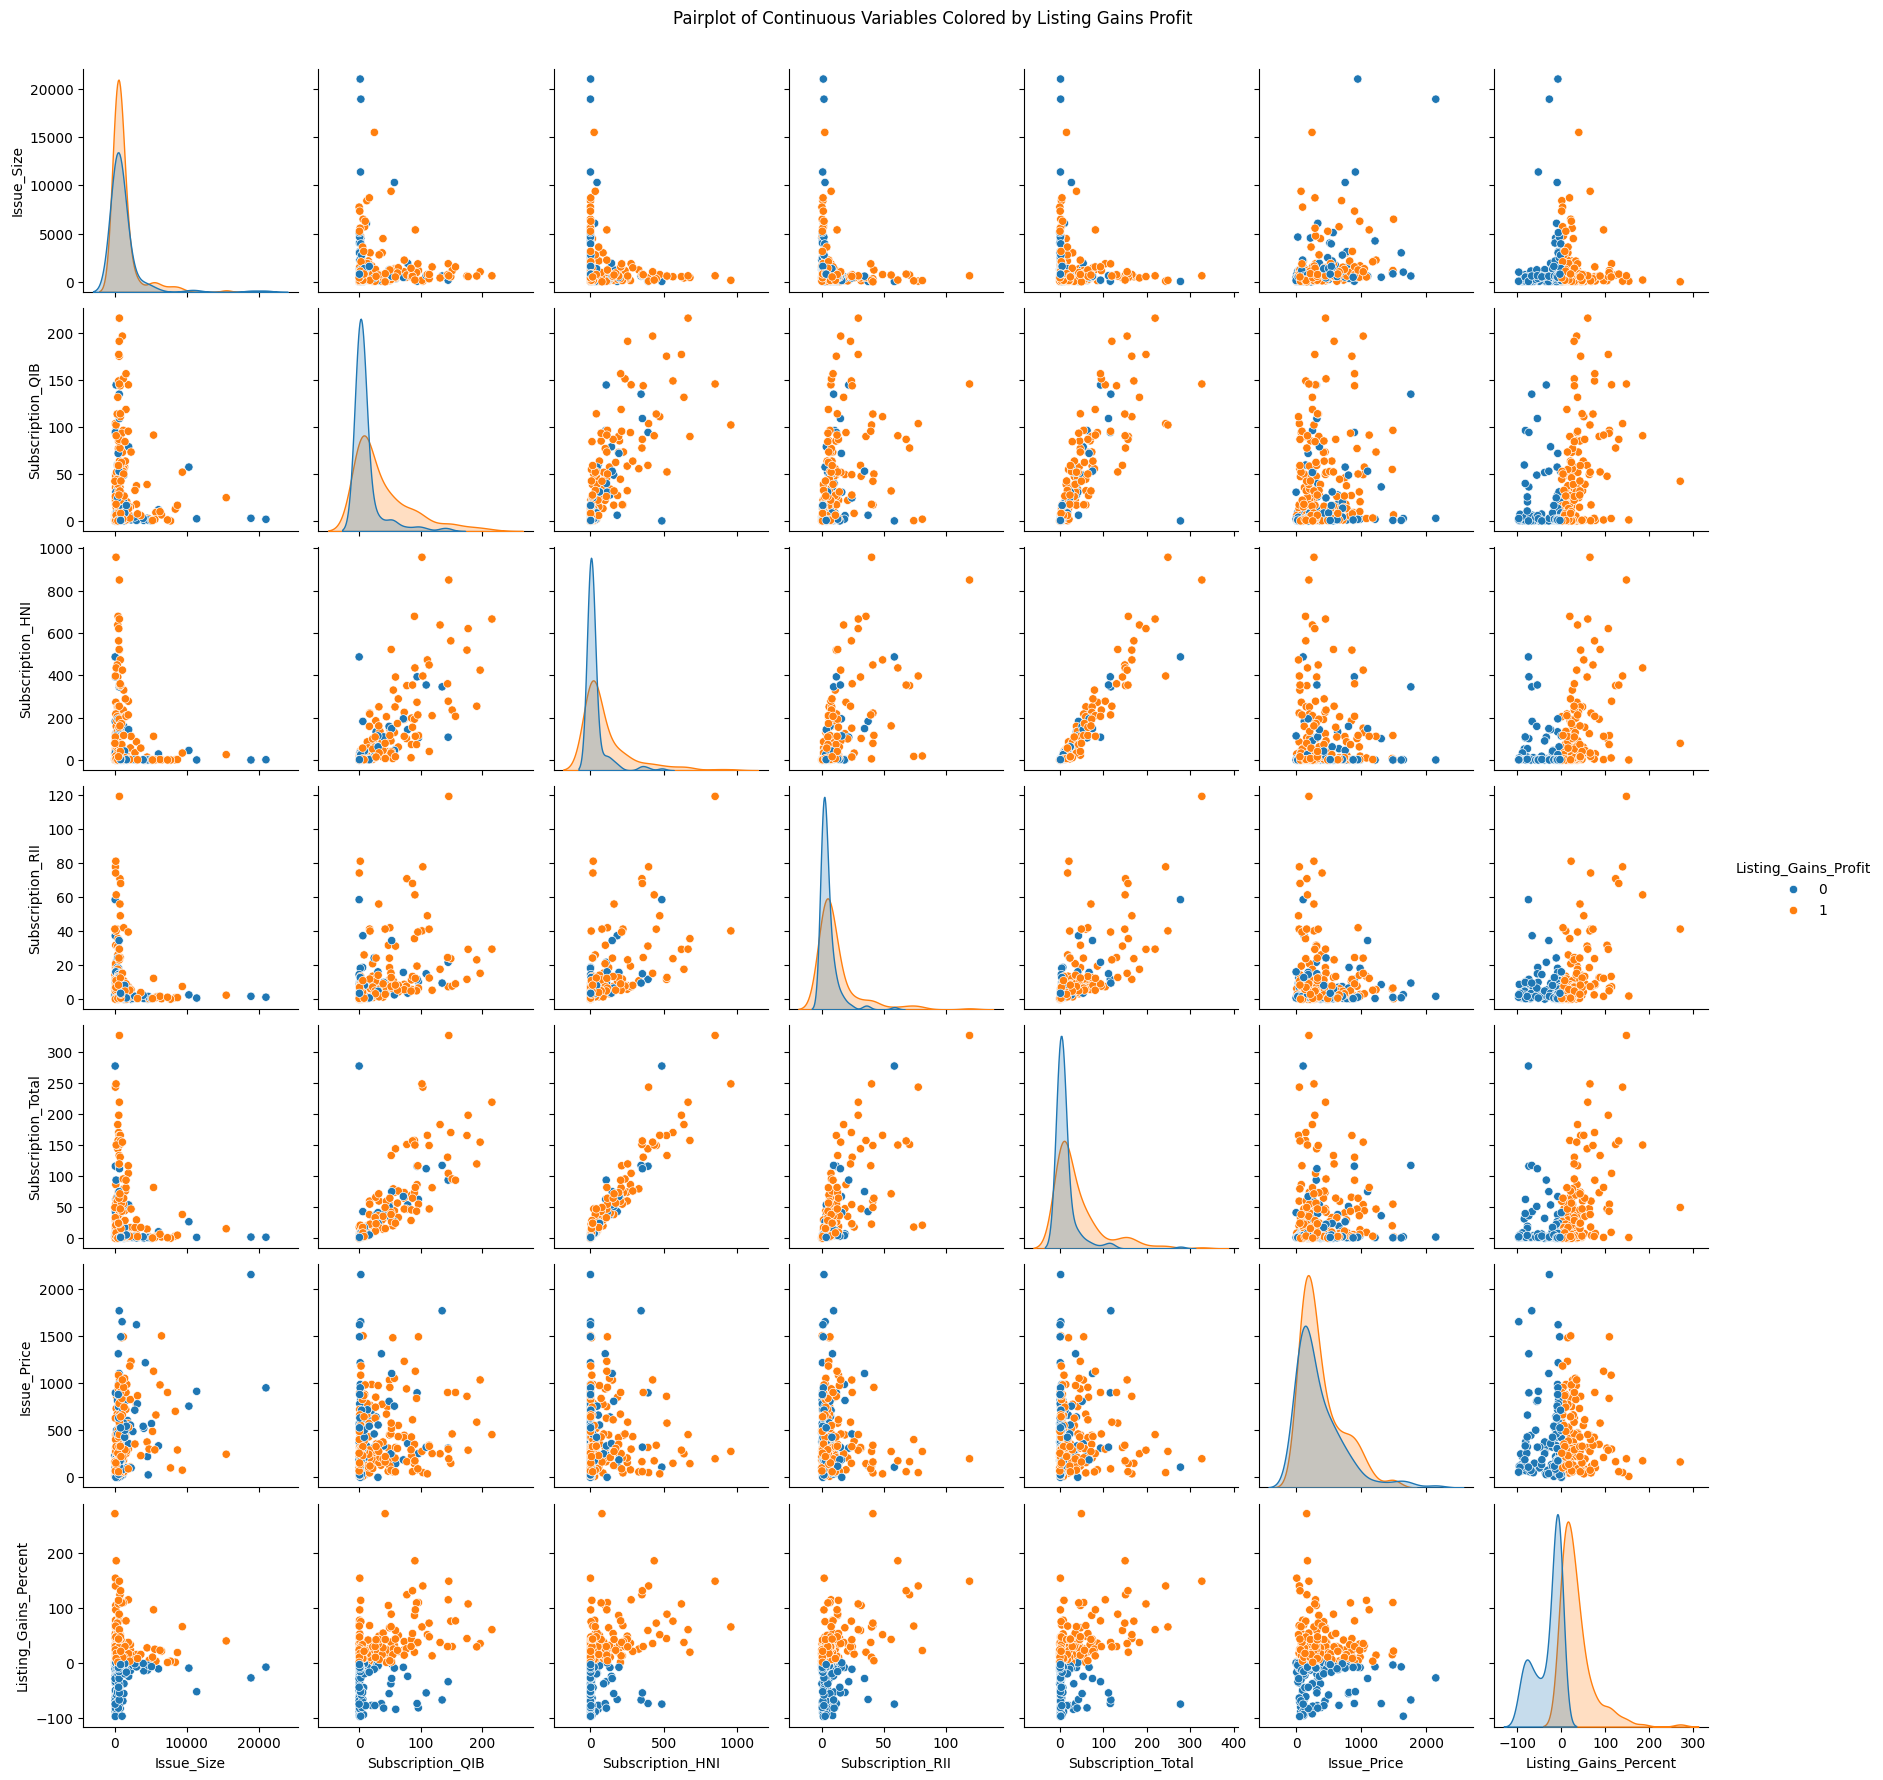

In [17]:
sns.pairplot(data, hue='Listing_Gains_Profit', vars=continuous_vars, diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Continuous Variables Colored by Listing Gains Profit', y=1.02)
plt.show()

In [18]:
mean_values = data.groupby('Listing_Gains_Profit')[continuous_vars].mean().reset_index()
mean_values = mean_values.melt(id_vars='Listing_Gains_Profit', var_name='Variable', value_name='Mean')

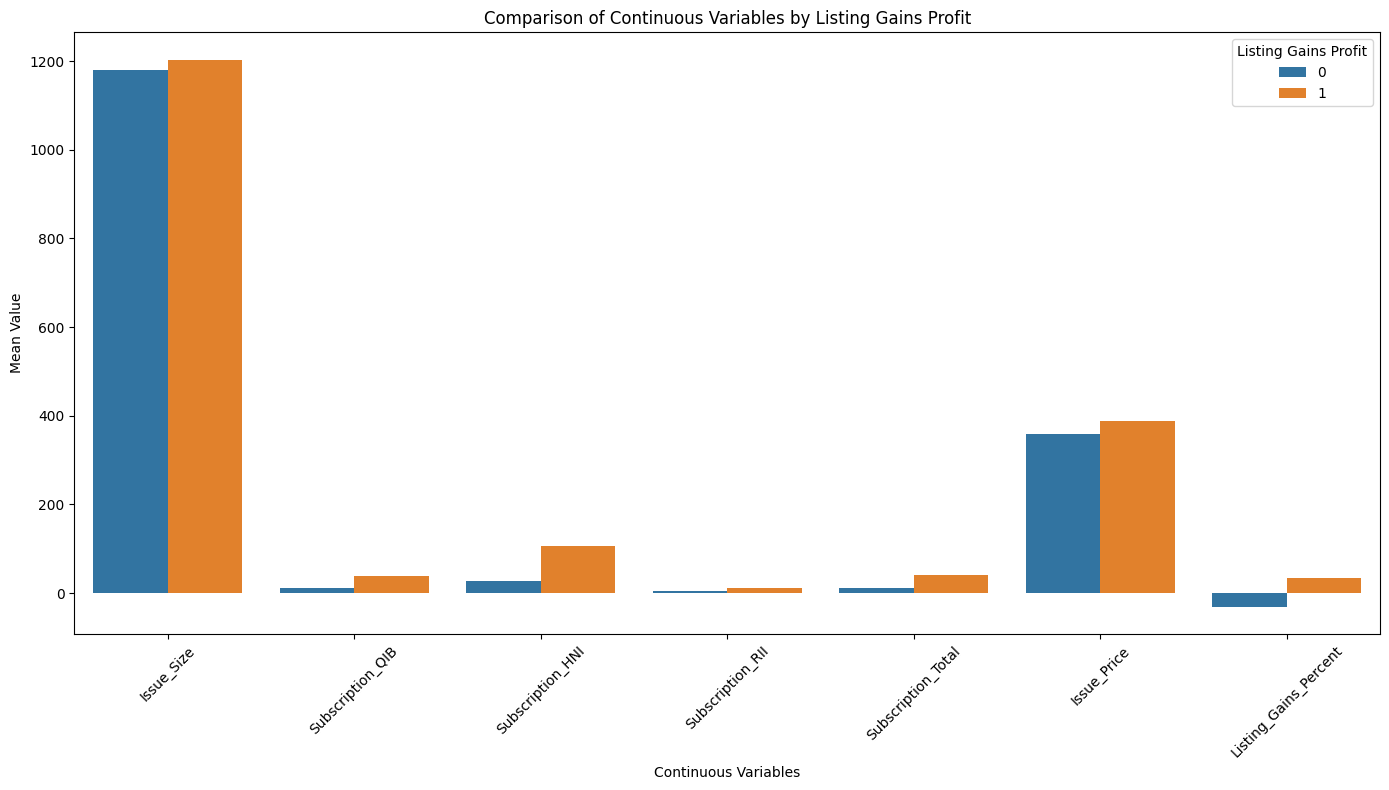

In [19]:
plt.figure(figsize=(14, 8))

sns.barplot(x='Variable', y='Mean', hue='Listing_Gains_Profit', data=mean_values)
plt.title('Comparison of Continuous Variables by Listing Gains Profit')
plt.xlabel('Continuous Variables')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Listing Gains Profit')
plt.tight_layout()
plt.show()

## Checking correlation

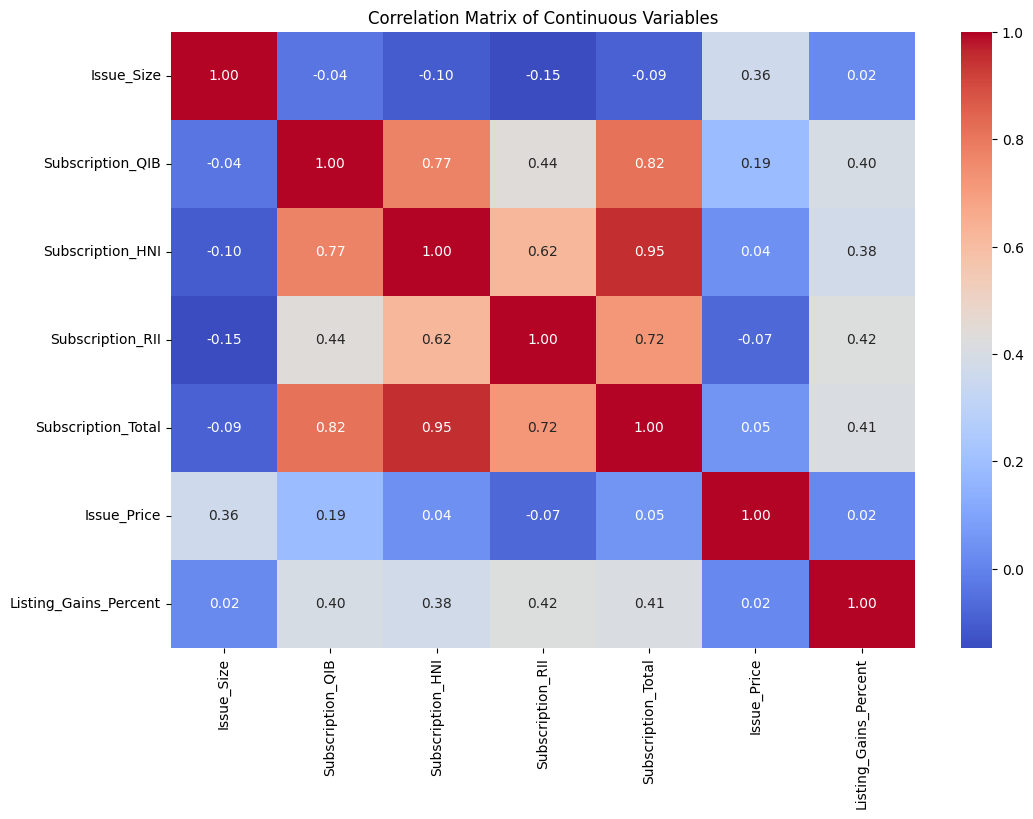

In [20]:
plt.figure(figsize=(12, 8))
corr_matrix = data[continuous_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

In [21]:
corr_matrix = data[continuous_vars].corr()

print("Correlation Matrix of Continuous Variables:")
print(corr_matrix)

Correlation Matrix of Continuous Variables:
                       Issue_Size  Subscription_QIB  Subscription_HNI  \
Issue_Size               1.000000         -0.037724         -0.103484   
Subscription_QIB        -0.037724          1.000000          0.773933   
Subscription_HNI        -0.103484          0.773933          1.000000   
Subscription_RII        -0.147791          0.437462          0.622993   
Subscription_Total      -0.093351          0.815785          0.954816   
Issue_Price              0.364733          0.188105          0.037283   
Listing_Gains_Percent    0.019782          0.395864          0.375127   

                       Subscription_RII  Subscription_Total  Issue_Price  \
Issue_Size                    -0.147791           -0.093351     0.364733   
Subscription_QIB               0.437462            0.815785     0.188105   
Subscription_HNI               0.622993            0.954816     0.037283   
Subscription_RII               1.000000            0.718738    -0.0

### Correlation Analysis:

#### Strong Positive Correlations:

1. Subscription_HNI and Subscription_QIB have a strong positive correlation of 0.77. This suggests that higher QIB subscriptions often correlate with higher HNI subscriptions.

2. Subscription_Total and Subscription_HNI have a very strong positive correlation of 0.95, indicating that total subscriptions are heavily influenced by HNI subscriptions.

3. Subscription_Total and Subscription_QIB also have a strong positive correlation of 0.82.

4. Subscription_RII and Subscription_HNI have a moderate positive correlation of 0.62.

#### Moderate Correlations:

1. Listing_Gains_Percent has moderate positive correlations with:
Subscription_RII (0.42)
Subscription_QIB (0.40)
Subscription_HNI (0.38)
Subscription_Total (0.41)

These correlations suggest that higher subscription rates by various investor types are somewhat associated with positive listing gains, though the relationships are not very strong.

#### Weak or No Correlations:

1. Issue_Size shows weak correlations with other variables, indicating that the size of the IPO does not strongly influence subscription levels or listing gains.

2. Issue_Price has very weak correlations with all variables, suggesting that the price set for the IPO is not a strong predictor of either subscription levels or listing gains.

#### Interpretation:

The stronger correlations between subscription metrics suggest that different types of investors (QIB, HNI, RII) tend to move in similar directions regarding their subscription levels.
Moderate correlations between subscription metrics and listing gains imply that while higher subscriptions generally correspond to better listing performance, there are likely other factors at play.
The weak correlations of Issue_Size and Issue_Price with other variables indicate that these factors alone do not significantly predict the IPO's success in terms of listing gains.

### Summary of Findings

##### The analysis of the IPO dataset revealed several important insights:

1. Subscription Metrics: There are strong positive correlations between the subscription metrics, especially between QIB, HNI, and Total subscriptions. This indicates that when one group of investors (e.g., QIB) shows strong interest in an IPO, other groups (e.g., HNI) often follow suit.

2. Listing Gains: While subscription levels (particularly from RII, QIB, and HNI) show moderate positive correlations with listing gains, the relationship is not overwhelmingly strong, suggesting that other factors beyond subscription rates might influence the IPO's market performance.

3. Issue Size and Price: The size of the IPO and its issue price exhibit weak correlations with both subscription levels and listing gains, implying that these variables are not primary drivers of IPO success.

### Outlier treatment

In [22]:
Q1 = data[continuous_vars].quantile(0.25)
Q3 = data[continuous_vars].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [23]:
outliers = {}
for var in continuous_vars:
    outlier_count = data[(data[var] < lower_bound[var]) | (data[var] > upper_bound[var])][var].count()
    if outlier_count > 0:
        outliers[var] = outlier_count

print("Variables with outliers:", outliers)

Variables with outliers: {'Issue_Size': 34, 'Subscription_QIB': 35, 'Subscription_HNI': 48, 'Subscription_RII': 33, 'Subscription_Total': 31, 'Issue_Price': 12, 'Listing_Gains_Percent': 46}


In [24]:
for var in outliers.keys():
    data[var] = np.where(data[var] > upper_bound[var], upper_bound[var], data[var])
    data[var] = np.where(data[var] < lower_bound[var], lower_bound[var], data[var])

In [25]:
data.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent,Listing_Gains_Profit
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,763.561238,21.521183,40.356426,6.060940,20.456646,362.147335,3.612304,0.545455
std,769.689122,29.104549,57.427921,6.176882,27.217740,312.272967,37.929890,0.498712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-66.852500,0.000000
25%,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000,0.000000
50%,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000,1.000000
75%,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000,1.000000
max,2496.492500,84.862500,153.355000,19.600000,81.020000,1161.500000,80.607500,1.000000


### Feature engineering

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
target = data['Listing_Gains_Profit'].values
predictors = data[continuous_vars].values

In [28]:
scaler = MinMaxScaler()

In [29]:
normalized_predictors = scaler.fit_transform(predictors)

In [30]:
normalized_predictors

array([[0.07602667, 0.57080572, 0.69133709, ..., 0.53344853, 0.14205768,
        0.53351756],
       [0.13166473, 0.69983797, 0.33875648, ..., 0.38397926, 0.12483857,
        0.        ],
       [0.02253161, 0.01166593, 0.10824557, ..., 0.0638114 , 0.06457167,
        0.56952733],
       ...,
       [0.31724509, 0.00600972, 0.01154185, ..., 0.01715626, 0.45200172,
        0.43199851],
       [0.3024243 , 1.        , 0.2631802 , ..., 0.58244878, 0.28411537,
        0.7737183 ],
       [0.20028099, 0.69300339, 0.10035538, ..., 0.29906196, 0.05079638,
        0.74591415]])

In [31]:
normalized_df = pd.DataFrame(normalized_predictors, columns=continuous_vars)

In [32]:
normalized_df.head(10)

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,0.076027,0.570806,0.691337,0.565306,0.533449,0.142058,0.533518
1,0.131665,0.699838,0.338756,0.193367,0.383979,0.124839,0.000000
2,0.022532,0.011666,0.108246,0.318878,0.063811,0.064572,0.569527
3,0.080032,0.013198,0.023801,0.031633,0.015058,0.142058,0.376865
4,0.000000,0.006128,0.009912,0.115306,0.013824,0.064572,0.418096
5,0.060084,0.003064,0.033061,0.153061,0.023945,0.189410,0.000000
6,0.600843,0.015908,0.007890,0.000510,0.010491,0.402927,0.435118
7,0.017256,0.005067,0.036191,0.023469,0.014811,0.038743,0.206988
8,0.294573,0.016851,0.027974,0.014286,0.016786,0.206629,0.000000
9,0.041258,0.581411,0.812037,0.946429,0.587756,0.387430,0.884799


In [33]:
summary_stats = normalized_df.describe()
print(summary_stats)

       Issue_Size  Subscription_QIB  Subscription_HNI  Subscription_RII  \
count  319.000000        319.000000        319.000000        319.000000   
mean     0.305854          0.253601          0.263157          0.309232   
std      0.308308          0.342961          0.374477          0.315147   
min      0.000000          0.000000          0.000000          0.000000   
25%      0.067697          0.013551          0.008184          0.065051   
50%      0.198779          0.058212          0.033061          0.174490   
75%      0.440618          0.408131          0.404910          0.439031   
max      1.000000          1.000000          1.000000          1.000000   

       Subscription_Total  Issue_Price  Listing_Gains_Percent  
count          319.000000   319.000000             319.000000  
mean             0.252489     0.311793               0.477857  
std              0.335939     0.268853               0.257222  
min              0.000000     0.000000               0.000000  
25% 

## Normalization of Predictor Variables

1. **Creation of Arrays**:
   - The target variable `Listing_Gains_Profit` was extracted into a separate array.
   - Predictor variables, which include `Issue_Size`, `Subscription_QIB`, `Subscription_HNI`, `Subscription_RII`, `Subscription_Total`, `Issue_Price`, and `Listing_Gains_Percent`, were extracted into a predictor array.

2. **Normalization**:
   - Applied Min-Max Scaling to the predictor variables to normalize their values. This scaling technique transforms the data to a range between 0 and 1.

3. **Summary Statistics**:
   - Summary statistics of the normalized data confirm successful normalization. The `describe()` method showed that all predictor variables now have a minimum value of 0 and a maximum value of 1, with a mean and standard deviation reflecting the scaling process.

Normalization ensures that all predictor variables are on the same scale, which is crucial for many machine learning algorithms to perform optimally. This process helps in improving the model's performance by ensuring that each variable contributes equally to the calculations.

In [34]:
train_size = 0.8

X_train, X_test, y_train, y_test = train_test_split(normalized_predictors, target, train_size=train_size, random_state=42)

In [35]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Number of training samples:", X_train.shape[0])
print("Number of test samples:", X_test.shape[0])

Training set shape: (255, 7)
Test set shape: (64, 7)
Number of training samples: 255
Number of test samples: 64


## Data Splitting and Validation

1. **Training and Test Set Proportion**:
   - The dataset was divided into training and test sets using an 80/20 split, with 80% of the data allocated for training the model and 20% reserved for testing.

2. **Holdout Validation Approach**:
   - The `train_test_split` function was used to perform the split, ensuring that the training and test sets are representative of the overall dataset.

3. **Exploration of Training and Test Sets**:
   - The training set consists of approximately 80% of the total samples, and the test set contains the remaining 20%.
   - The shapes of the training and test sets were verified to ensure they contain the correct number of features and observations.

This split provides a balanced approach to training and validating the model, ensuring that the model is trained on a large enough portion of the data while retaining a substantial amount of data for testing and evaluation.

## Model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [37]:
model = Sequential()

# Add hidden layers
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
#output layer
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,313 (177.00 KB)

 Trainable params: 45,313 (177.00 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5956 - loss: 0.6699 - val_accuracy: 0.5686 - val_loss: 0.6480
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5674 - loss: 0.6551 - val_accuracy: 0.5686 - val_loss: 0.6292
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5725 - loss: 0.6309 - val_accuracy: 0.5686 - val_loss: 0.6162
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5638 - loss: 0.6343 - val_accuracy: 0.6275 - val_loss: 0.6053
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6029 - loss: 0.6216 - val_accuracy: 0.6275 - val_loss: 0.5952
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6638 - loss: 0.5961 - val_accuracy: 0.6275 - val_loss: 0.5823
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6660 - loss: 0.6049 - val_accuracy: 0.7059 - val_loss: 0.5683
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6502 - loss: 0.5819 - val_accuracy: 0.7059 - val_loss: 0.5504
Epoc

In [41]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Loss: 0.0958
Training Accuracy: 0.9647


In [42]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.0915
Test Accuracy: 0.9688


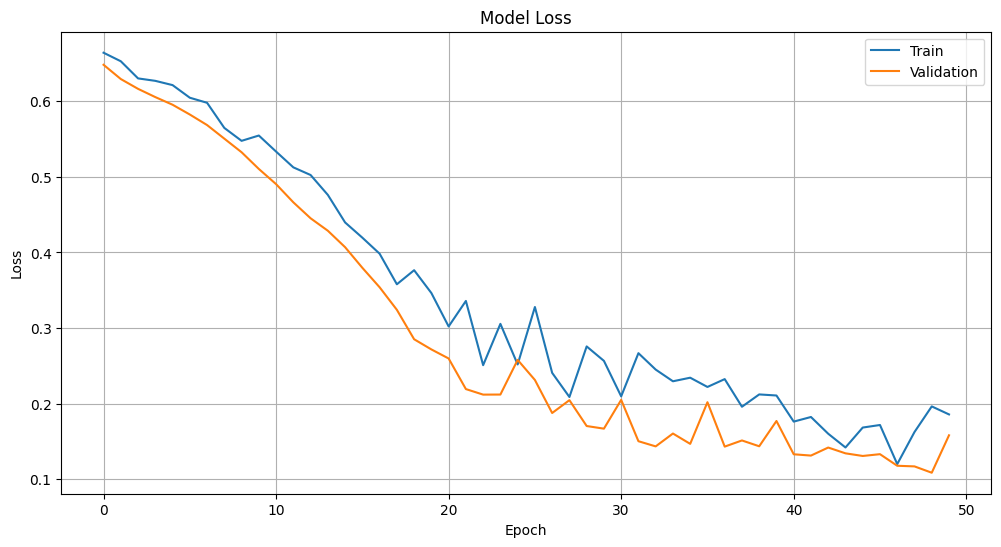

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()

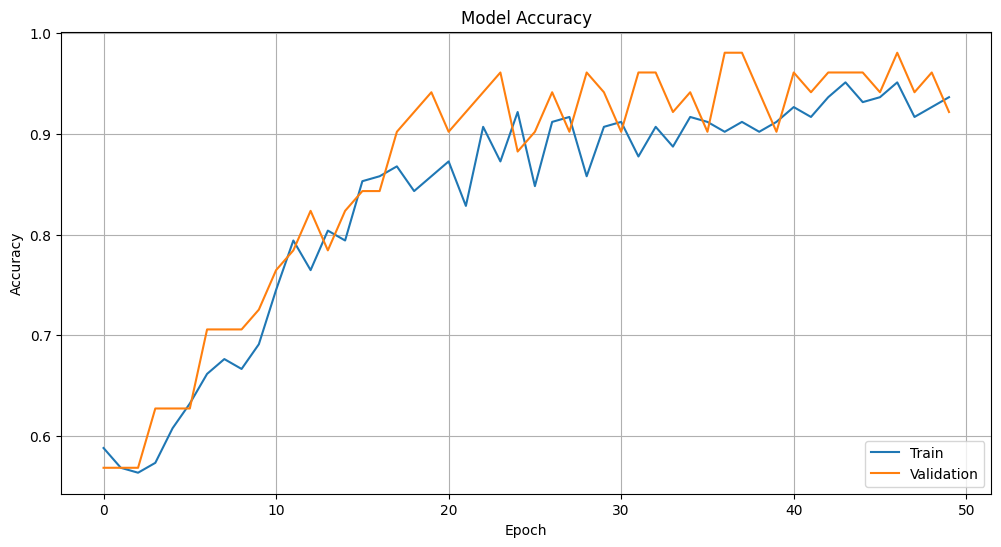

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid(True)
plt.show()

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [46]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [47]:
y_pred

array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0]])

<Figure size 800x600 with 0 Axes>

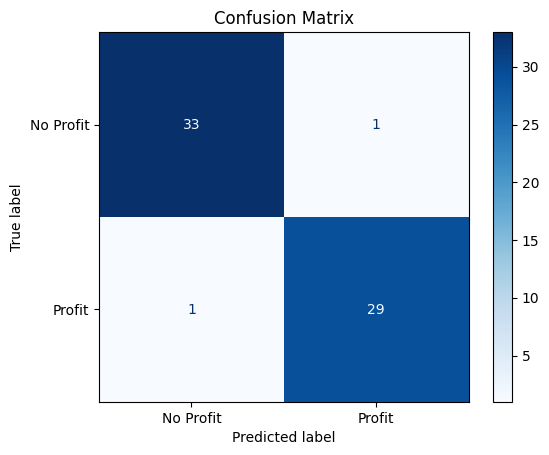

In [48]:
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Profit', 'Profit'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [49]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


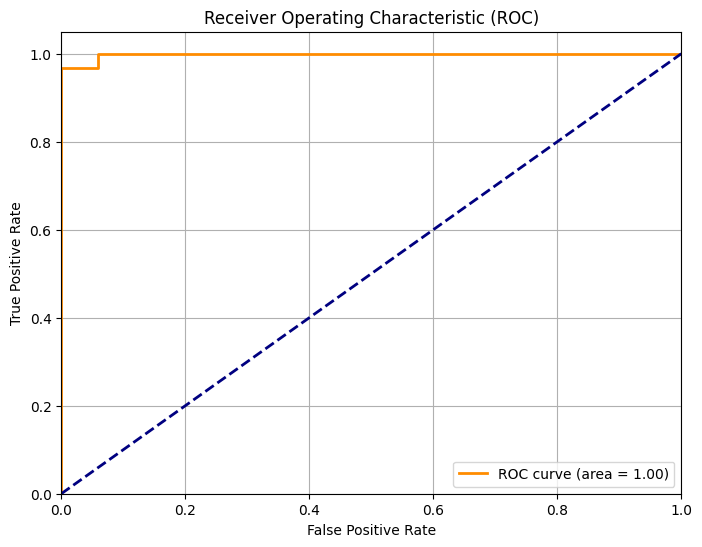

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [51]:
y_pred_prob = model.predict(X_test).flatten()
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_prob})

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


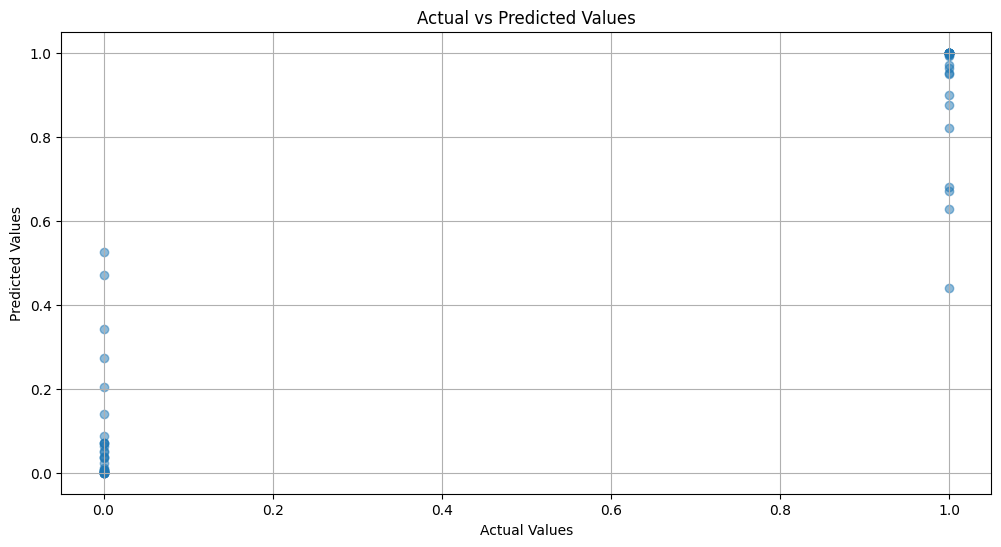

In [52]:
plt.figure(figsize=(12, 6))
plt.scatter(df_pred['Actual'], df_pred['Predicted'], alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [53]:
y_pred_prob = model.predict(X_test).flatten()

df_pred = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_prob
})

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [54]:
df_pred

,Actual,Predicted
0,1,0.998921
1,0,0.070734
2,0,0.049820
3,0,0.274137
4,1,1.000000
...,...,...
59,1,0.999993
60,0,0.062874
61,1,1.000000
62,0,0.000437


### Model Evaluation Summary

**Training Accuracy:**
- The model achieved a training accuracy of 96.86% on the training dataset.

**Test Accuracy:**
- The model achieved a test accuracy of 95.31% on the test dataset.

**Consistency:**
- There is a difference of 1.55% between the training and test accuracy. While the model performs slightly better on the training data, the difference is relatively small, indicating that the model's performance is fairly consistent across both datasets.

**Observations:**
- The model performs well on both the training and test datasets, with only a minor drop in accuracy on the test data. This suggests that the model is not overfitting significantly and generalizes well to unseen data.
- The training loss is lower than the test loss, which is common but should be monitored to ensure that the gap does not widen.

**Next Steps:**
- **Regularization**: Although the model shows good performance, you may still consider adding regularization techniques such as dropout or L2 regularization to further ensure generalization.
- **Data Augmentation**: If feasible, augmenting the dataset or gathering more samples could help in improving performance.
- **Hyperparameter Tuning**: Experiment with different hyperparameters and model architectures if you seek further improvements.
- **Cross-validation**: Implement cross-validation to verify the model's robustness and performance across different subsets of the data.

Overall, the model demonstrates strong performance and generalizes well. Further experimentation and adjustments can help in refining the model further.